**1. About Dataset**

On March 20th, the world celebrates the International Day of Happiness. On this day, in 2017, the UN also release the World Happiness Report - a ranking of which countries in the world could be considered as "happy". This report contains 155 countries from each continent to construct an understanding of which countries may be the happiest. This ranking is revered across the globe, as it could be an indication of the country's policy-making decision skills. Experts around the world have noted that these scores may be a good indication of a country's progress.


In [1]:
import pandas as pd # data processing
import chart_studio.plotly as py #for data visualization
import plotly.graph_objs as go #for data visualization
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
df_2015 = pd.read_csv('../input/world-happiness/2015.csv')
df_2016 = pd.read_csv('../input/world-happiness/2016.csv')
df_2017 = pd.read_csv('../input/world-happiness/2017.csv')

**2.Preparing and Describing the Data**

In [3]:
df_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [4]:
df_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Data was separated into three files if someone chose to analyze all three years separately. However, I decided that it would be interesting to observe the data from a holistic point of view. Therefore, once I imported the data and removed any columns that I felt were unnecessary to this analysis and used pd.concate to put together all three data frames, and observe the overall happiness rank based on the past three years. After that to study individual regions I will use each years data to analyse.

In [5]:
df_2015.columns = ['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']
new_df_2015 = df_2015.drop(['Standard Error'], axis=1)

In [6]:
new_df_2015.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
drop_2016 = ['Lower Confidence Interval','Upper Confidence Interval' ]
new_df_2016 = df_2016.drop(drop_2016, axis=1)
new_df_2016.columns = ['Country', 'Region','Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [8]:
new_df_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [9]:
columns_2017 = ['Whisker.high','Whisker.low' ]
new_df_2017 = df_2017.drop(columns_2017, axis=1)
new_df_2017.columns = ['Country', 'Happiness_Rank', 'Happiness_Score','Economy', 'Family',
       'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual']

In [10]:
new_df_2017.head()

,Country,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [11]:
new_df_2015['Year']=2015
new_df_2016['Year']=2016
new_df_2017['Year']=2017
frames = [new_df_2015, new_df_2016, new_df_2017]
happiness = pd.concat(frames,sort=True)

In [12]:
happiness.head()
new_df_2016.head()

,Country,Region,Happiness_Rank,Happiness_Score,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


**3. Visualization**

This visual gives us a more appealing view of where each country is placed in the World ranking report. How to read the map: the darker colored countries (purple — blue) have the highest rating on the report (i.e. are the “happiest), while the lighter colored countries have a lower ranking. We can clearly see that countries in the European, and Americas region have a fairly high ranking than ones in the Asian and African regions.

In [13]:
data1 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Rank'], 
           text = happiness['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap6 = go.Figure(data = [data1], layout=layout)
iplot(choromap6)

In [14]:
data2 = dict(type = 'choropleth', 
           locations = happiness['Country'],
           locationmode = 'country names',
           z = happiness['Happiness_Score'], 
           text = happiness['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'mercator'}))
choromap3 = go.Figure(data = [data2], layout=layout)
iplot(choromap3)

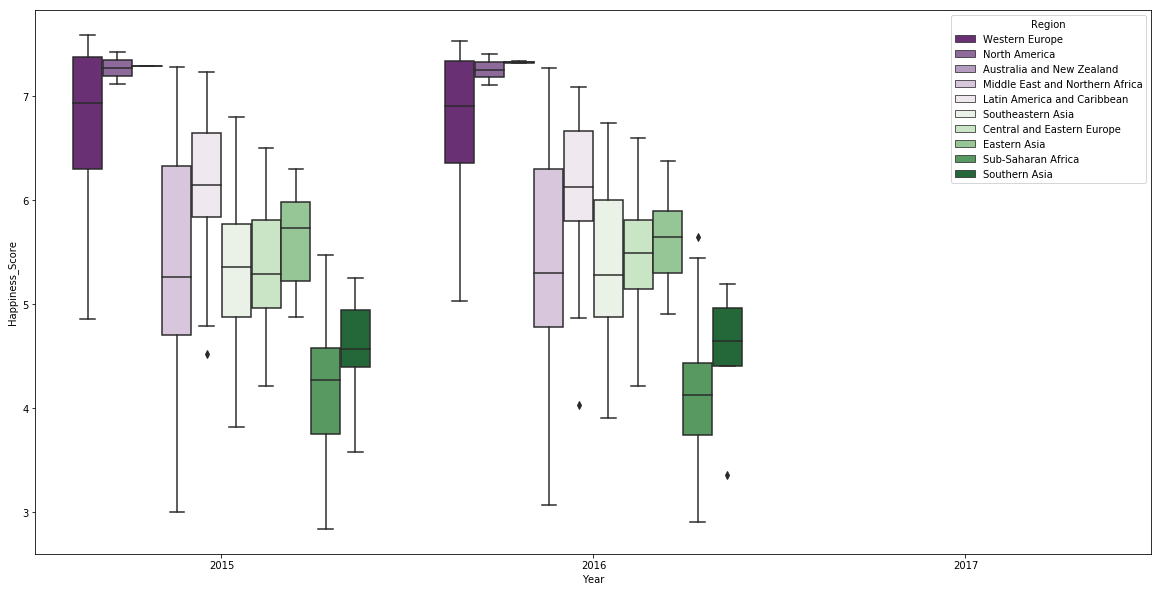

In [15]:
f,ax = plt.subplots(figsize =(20,10))
sns.boxplot(x="Year" , y="Happiness_Score", hue="Region",data=happiness,palette="PRGn",ax=ax)
plt.show()

It can be oberserved from the heatmap of 2015 and 2016 that Happiness score is highly coreleated with Economy, Family and Health.

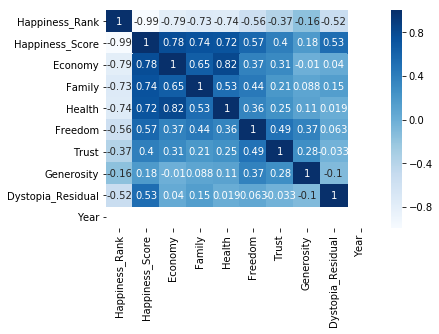

In [16]:
sns.heatmap(new_df_2015.corr(), cmap='Blues',annot = True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

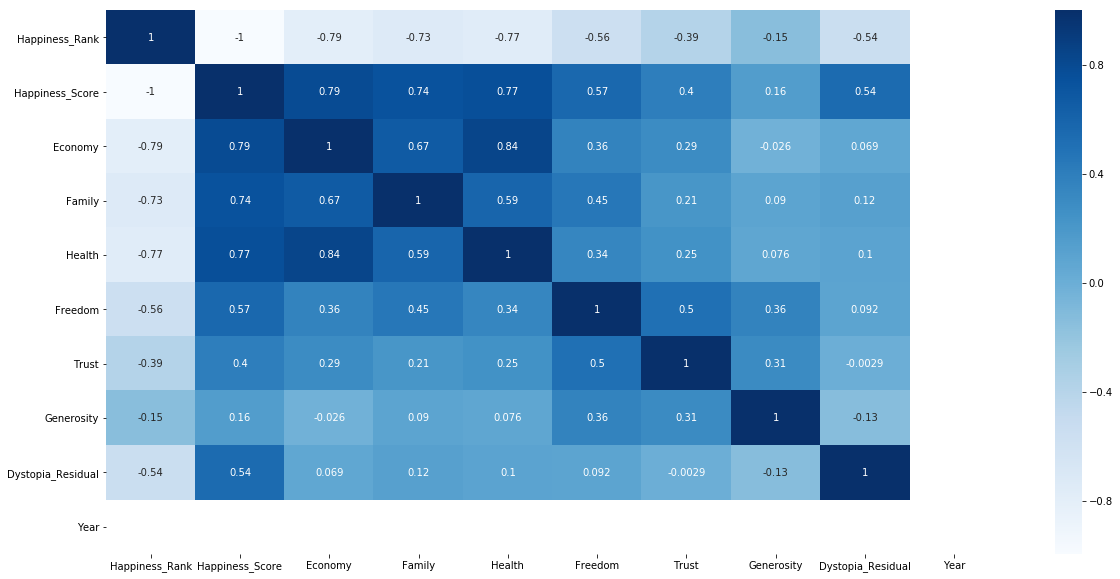

In [17]:
sns.heatmap(new_df_2016.corr(), cmap='Blues',annot = True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

In [18]:
data4 = new_df_2015.groupby('Region')['Happiness_Score','Economy','Family','Health'].median()
data4 = pd.DataFrame(data4)
data4

,Happiness_Score,Economy,Family,Health
Region,,,,
Australia and New Zealand,7.285,1.291880,1.314450,0.919965
Central and Eastern Europe,5.286,1.012160,1.106140,0.731280
Eastern Asia,5.729,1.257675,1.067175,0.920340
Latin America and Caribbean,6.149,0.909400,1.146430,0.696060
Middle East and Northern Africa,5.262,1.017220,1.000120,0.721090
North America,7.273,1.360400,1.284860,0.883710
Southeastern Asia,5.360,0.705320,1.020000,0.637930
Southern Asia,4.565,0.595430,0.431060,0.568740
Sub-Saharan Africa,4.272,0.308445,0.878375,0.298155


Scatterplot between Happiness Score and Economy, Family and Health for Regions shows linear relaionship between them so high corelation between them is justified.

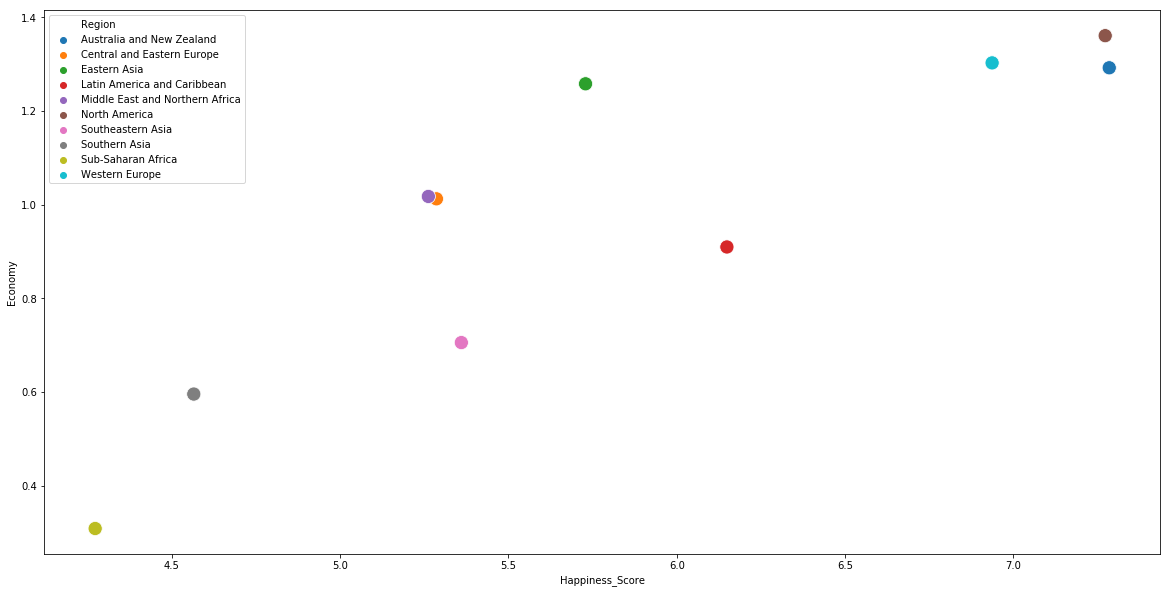

In [19]:
sns.scatterplot(data4['Happiness_Score'], data4['Economy'],hue = data4.index, legend='brief',s=200)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

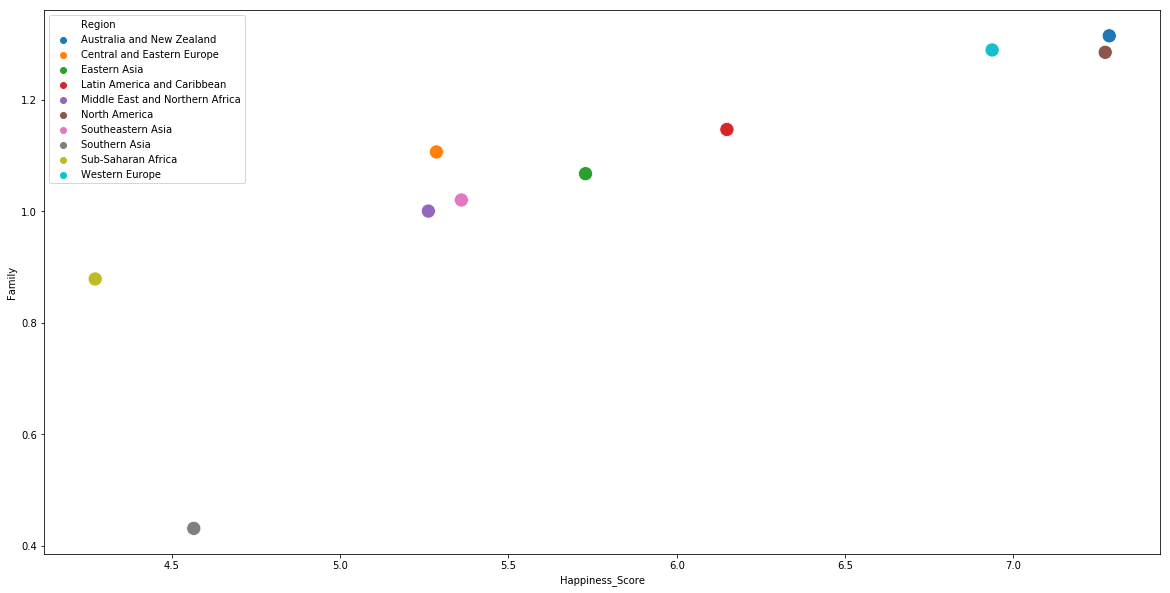

In [20]:
sns.scatterplot(data4['Happiness_Score'], data4['Family'],hue = data4.index, legend='brief',s=200)
plt.show()

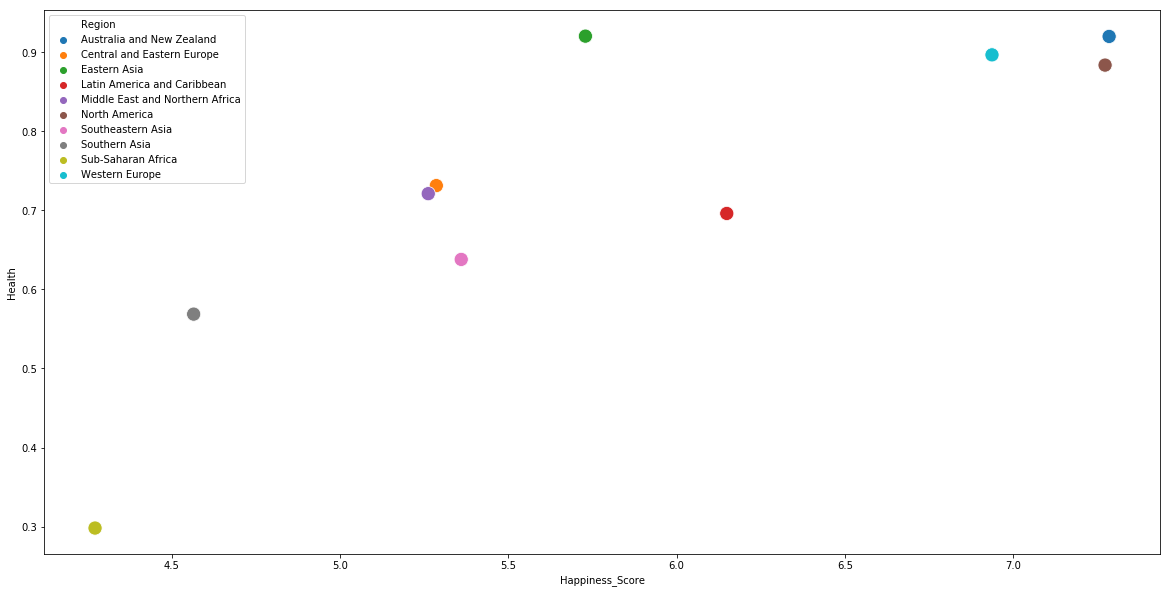

In [21]:
sns.scatterplot(data4['Happiness_Score'], data4['Health'],hue = data4.index, legend='brief',s=200)
plt.show()

Now we will observe the corelation between different factors of regions of high happiness score.

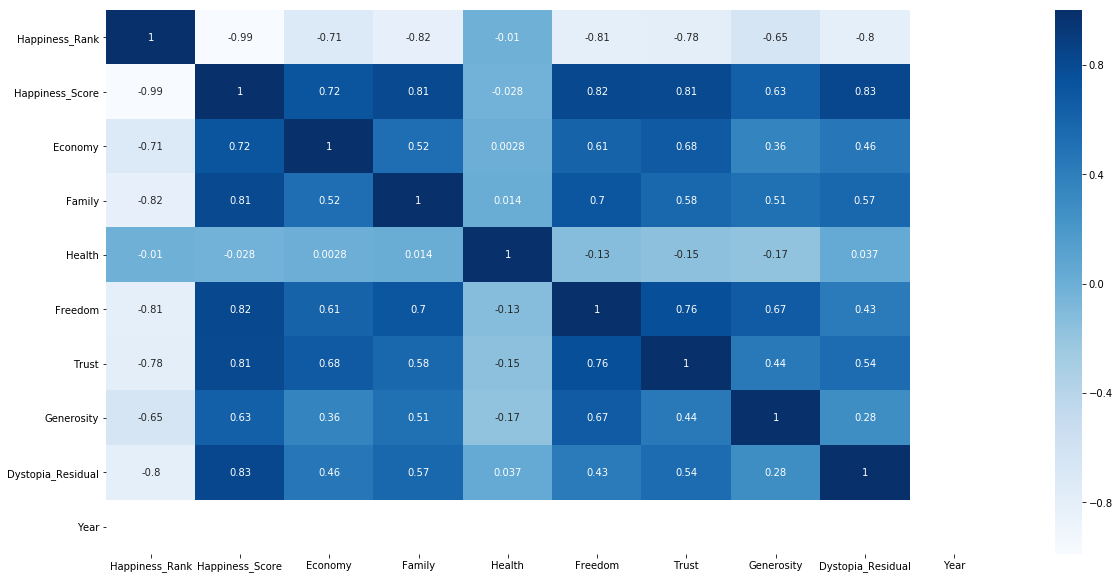

In [22]:
df_1 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Western Europe']
df_2 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'North America']
df = pd.concat([df_1, df_2], axis = 0)
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

The thing which needs to be observed from the heatmap of high happniess score regions is that that is quiet low corelation between Happiness Score and Health(Life Expectancy) and high corelation is observed with Economy, Family, Freedom and Trust. To justify this we will make scatterplot between Happiness Score and Economy Health and it can be obsereved that there is linear relatioj between with Economy but with Health its linear for smaller values but become random at larger values so extremely low corelation is justified.

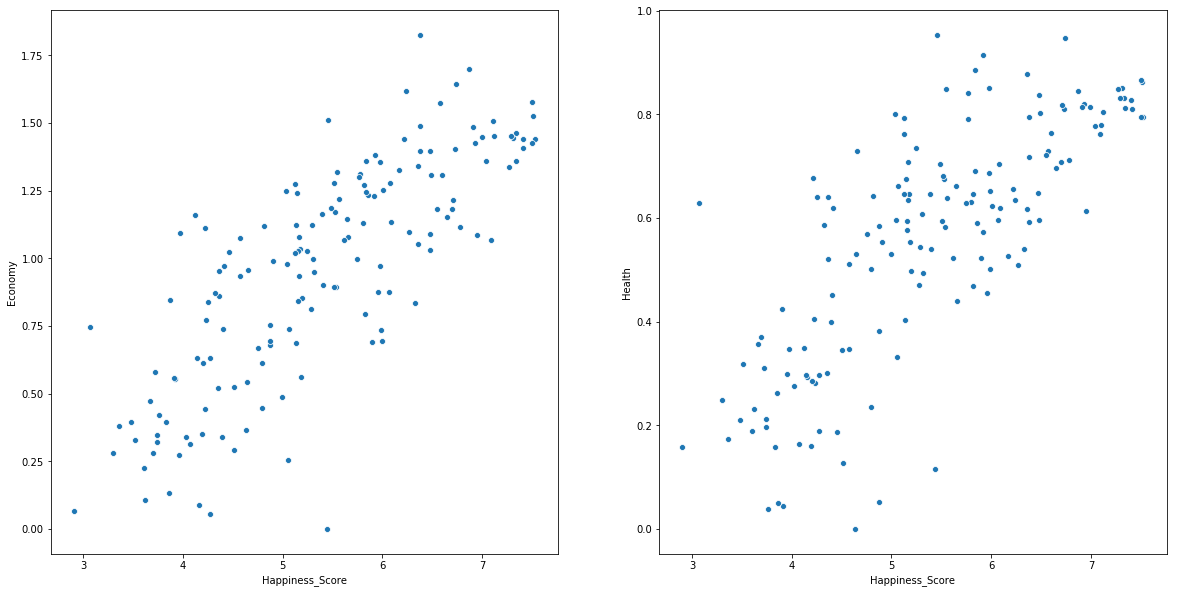

In [23]:
plt.subplot(1,2,1)
sns.scatterplot(new_df_2016['Happiness_Score'], new_df_2016['Economy'],)
plt.subplot(1,2,2)
sns.scatterplot(new_df_2016['Happiness_Score'], new_df_2016['Health'])
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

**Now we will study region with low Happiness Score.
**

For low happniess Regions it can be observed that happiness score has high corealation of happiness score with Economy, Family and Health.

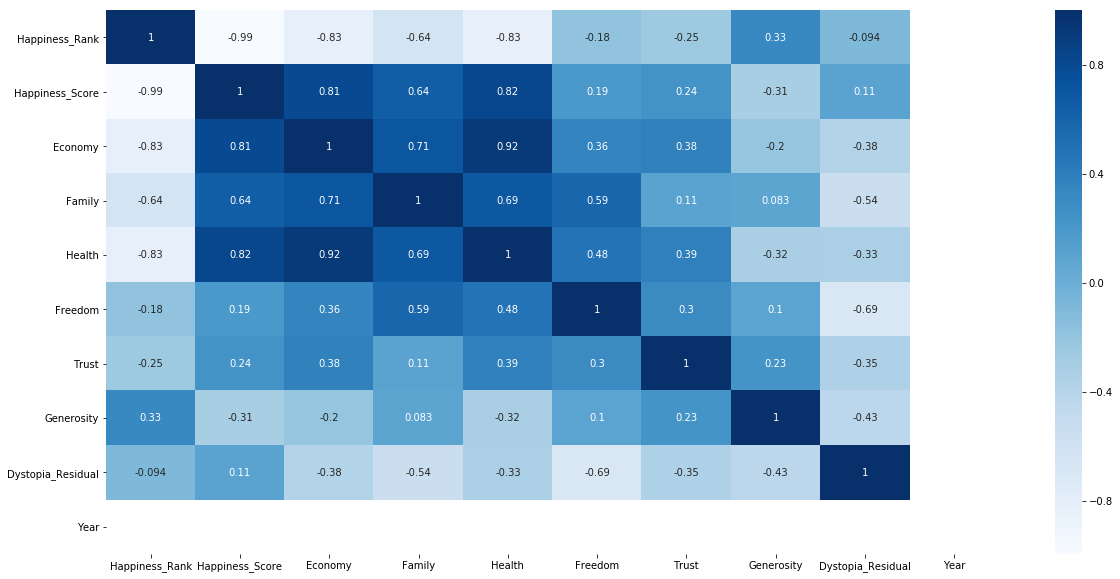

In [24]:
df_1 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Eastern Asia']
df_2 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Sub Saharan Africa']
df_3 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Southern Asia']
df = pd.concat([df_1, df_2,df_3], axis = 0)
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

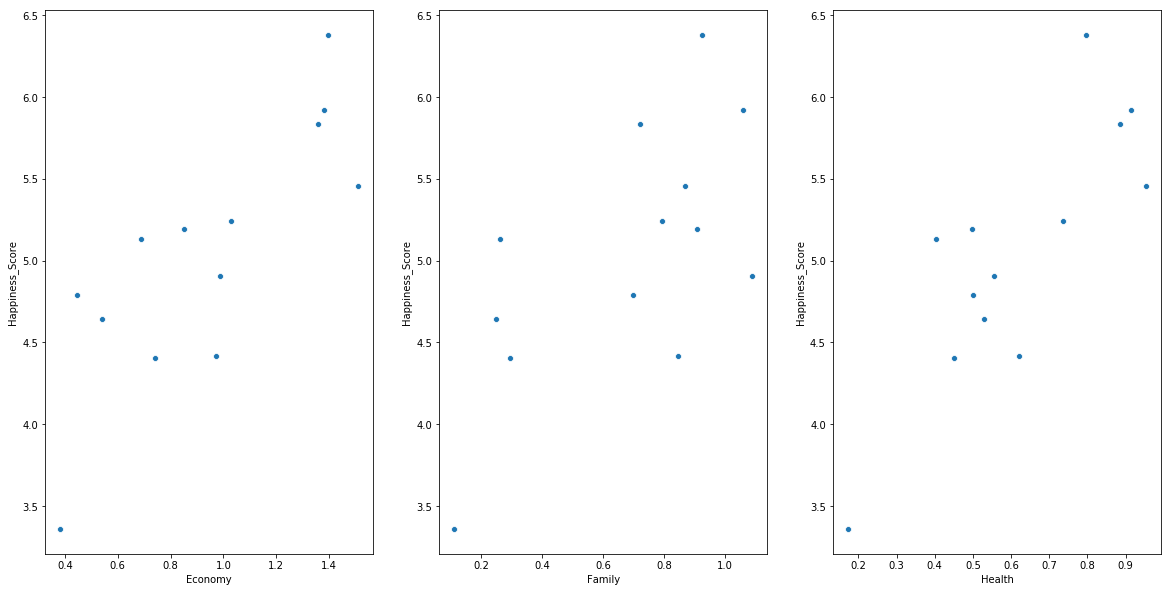

In [25]:
plt.subplot(1,3,1)
sns.scatterplot(df['Economy'],df['Happiness_Score'])
plt.subplot(1,3,2)
sns.scatterplot(df['Family'],df['Happiness_Score'])
plt.subplot(1,3,3)
sns.scatterplot(df['Health'],df['Happiness_Score'])
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

**Analysis of Moderate Happiness Score Regions**

Similar Corelation is observed here.

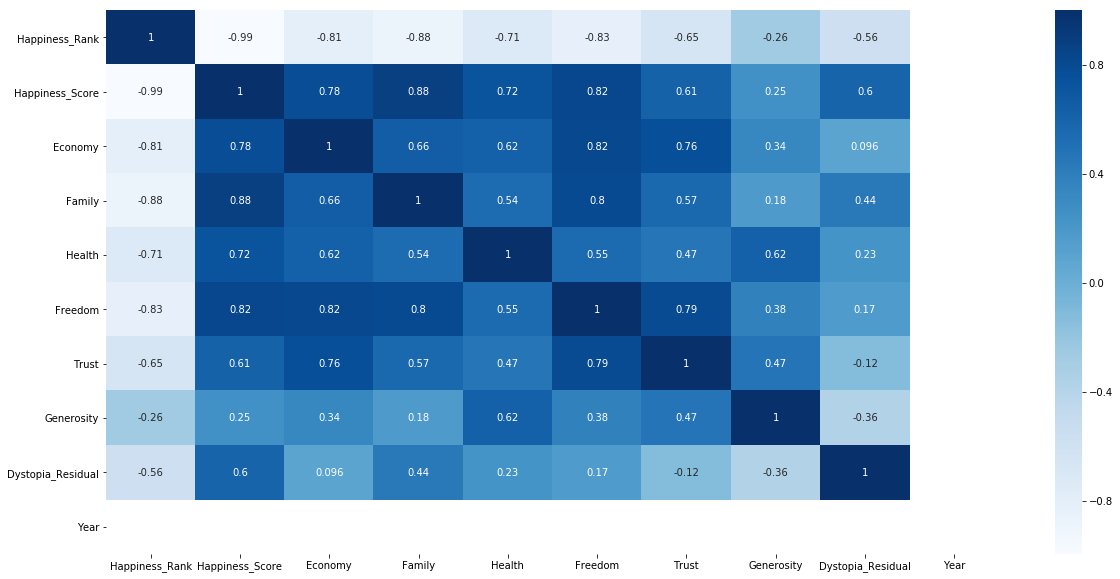

In [26]:
df_1 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Australia and New Zealand']
df_2 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Middle East and Northern Africa']
df_3 = new_df_2016.loc[lambda new_df_2016: new_df_2016['Region'] == 'Latin America and Caribean']
df = pd.concat([df_1, df_2,df_3], axis = 0)
sns.heatmap(df.corr(), cmap = 'Blues', annot = True)
plt.rcParams['figure.figsize'] = (20, 10)
plt.show()

**Please appreciate with upvote**